In [17]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

In [4]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,0.0,0.0
2025-01-15 00:00:00-05:00,5905.209961,5960.609863,5905.209961,5949.910156,4544570000,0.0,0.0
2025-01-16 00:00:00-05:00,5963.609863,5964.689941,5930.720215,5937.339844,4285810000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-01-06 00:00:00-05:00', '2025-01-07 00:00:00-05:00',
               '2025-01-08 00:00:00-05:00', '2025-01-10 00:00:00-05:00',
               '2025-01-13 00:00:00-05:00', '2025-01-14 00:00:00-05:00',
               '2025-01-15 00:00:00-05:00', '2025-01-16 00:00:00-05:00',
               '2025-01-17 00:00:00-05:00', '2025-01-21 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24379, freq=None)

<Axes: xlabel='Date'>

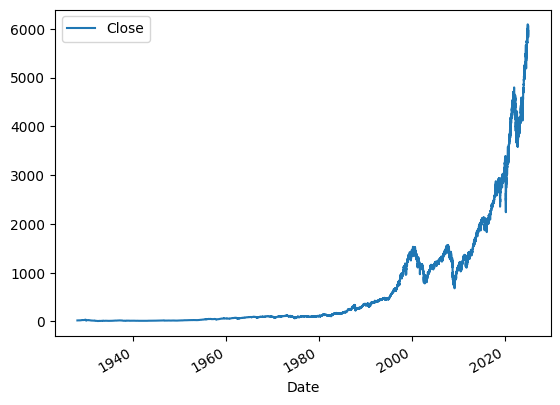

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,5949.910156
2025-01-15 00:00:00-05:00,5905.209961,5960.609863,5905.209961,5949.910156,4544570000,5937.339844
2025-01-16 00:00:00-05:00,5963.609863,5964.689941,5930.720215,5937.339844,4285810000,5996.660156


In [8]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,5949.910156,1
2025-01-15 00:00:00-05:00,5905.209961,5960.609863,5905.209961,5949.910156,4544570000,5937.339844,0
2025-01-16 00:00:00-05:00,5963.609863,5964.689941,5930.720215,5937.339844,4285810000,5996.660156,1


In [9]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,5949.910156,1
2025-01-15 00:00:00-05:00,5905.209961,5960.609863,5905.209961,5949.910156,4544570000,5937.339844,0
2025-01-16 00:00:00-05:00,5963.609863,5964.689941,5930.720215,5937.339844,4285810000,5996.660156,1


In [10]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [20]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.47058823529411764

<Axes: xlabel='Date'>

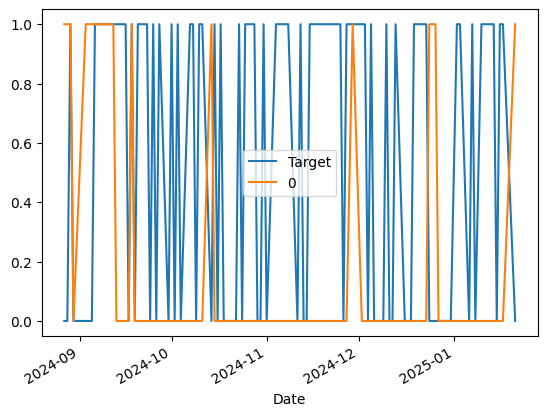

In [21]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [30]:
def backtest(data, model, predicotrs, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predicotrs, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [31]:
predictions = backtest(sp500, model, predictors)

In [32]:
predictions["Predictions"].value_counts()

Predictions
0    3693
1    2636
Name: count, dtype: int64

In [33]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5284522003034902

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]